### Import Necessary Packages

In [1]:
library('tidyverse')
library('lubridate')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Import Data

In [2]:
data.url <- "https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD"
data.raw <- read.csv(data.url)

### Remove Unnecessary Columns and Rename Columns

In [3]:
data.raw.cols <- colnames(data.raw)

data.raw.cols

for (i in 1:length(data.raw.cols)) {
    cat(i, "-", data.raw.cols[i], "\n")
}

# Determine the columns we don't need to keep
data.raw.cols.bad <- c(1, 5, 6, 7, 17, 18, 19)

# We'll change our naming style a bit
data.clean.cols <- c(
    "Date", "Time", "Borough", "Murder", "PerpAge", "PerpSex", "PerpRace",
    "VictimAge", "VictimSex", "VictimRace", "Xcoord", "Ycoord"
)

# Create cleaned data
data.full <- data.raw[-data.raw.cols.bad] %>%
    setNames(data.clean.cols) %>%
    arrange(Date, Time) %>%
    mutate(Date=mdy(Date)) %>%
    mutate(Time=hms(Time)) %>%
    arrange(Date, Time)

# Replace all empty cells with NA
data.full.dims <- dim(data.full)
data.full.nrows <- data.full.dims[1]
data.full.ncols <- data.full.dims[2]

# For some reason 2 values in age are 940 and 224
data.full.bad.values <- c("", "UNKNOWN", "U", "940", "224")
for (i in 1:data.full.nrows) {
    for (j in 1:data.full.ncols) {
        val <- data.full[i, j]
        if (val %in% data.full.bad.values) {
            data.full[i, j] = NA
        }
    }
}

# Make sure we don't have any funky values left
unique(data.full$Murder)
unique(data.full$PerpAge)
unique(data.full$PerpSex)
unique(data.full$PerpRace)
unique(data.full$VictimAge)
unique(data.full$VictimSex)
unique(data.full$VictimRace)
summary(data.full)
data.full

[1] "INCIDENT_KEY"            "OCCUR_DATE"             
 [3] "OCCUR_TIME"              "BORO"                   
 [5] "PRECINCT"                "JURISDICTION_CODE"      
 [7] "LOCATION_DESC"           "STATISTICAL_MURDER_FLAG"
 [9] "PERP_AGE_GROUP"          "PERP_SEX"               
[11] "PERP_RACE"               "VIC_AGE_GROUP"          
[13] "VIC_SEX"                 "VIC_RACE"               
[15] "X_COORD_CD"              "Y_COORD_CD"             
[17] "Latitude"                "Longitude"              
[19] "Lon_Lat"

1 - INCIDENT_KEY 
2 - OCCUR_DATE 
3 - OCCUR_TIME 
4 - BORO 
5 - PRECINCT 
6 - JURISDICTION_CODE 
7 - LOCATION_DESC 
8 - STATISTICAL_MURDER_FLAG 
9 - PERP_AGE_GROUP 
10 - PERP_SEX 
11 - PERP_RACE 
12 - VIC_AGE_GROUP 
13 - VIC_SEX 
14 - VIC_RACE 
15 - X_COORD_CD 
16 - Y_COORD_CD 
17 - Latitude 
18 - Longitude 
19 - Lon_Lat 


[1] "false" "true"

[1] "18-24" "25-44" NA      "45-64" "<18"   "65+"   "1020"

[1] "M" NA  "F"

[1] "BLACK"                          NA                              
[3] "WHITE HISPANIC"                 "BLACK HISPANIC"                
[5] "WHITE"                          "ASIAN / PACIFIC ISLANDER"      
[7] "AMERICAN INDIAN/ALASKAN NATIVE"

[1] "<18"   "25-44" "18-24" "45-64" "65+"   NA

[1] "M" "F" NA

[1] "BLACK"                          "WHITE HISPANIC"                
[3] "BLACK HISPANIC"                 "WHITE"                         
[5] "ASIAN / PACIFIC ISLANDER"       NA                              
[7] "AMERICAN INDIAN/ALASKAN NATIVE"

      Date                 Time                             Borough         
 Min.   :2006-01-01   Min.   :0S                          Length:23585      
 1st Qu.:2008-12-31   1st Qu.:3H 20M 0S                   Class :character  
 Median :2012-02-27   Median :15H 0M 0S                   Mode  :character  
 Mean   :2012-10-05   Mean   :12H 33M 7.48187407250225S                     
 3rd Qu.:2016-03-02   3rd Qu.:20H 45M 0S                                    
 Max.   :2020-12-31   Max.   :23H 59M 0S                                    
    Murder            PerpAge            PerpSex            PerpRace        
 Length:23585       Length:23585       Length:23585       Length:23585      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

Date,Time,Borough,Murder,PerpAge,PerpSex,PerpRace,VictimAge,VictimSex,VictimRace,Xcoord,Ycoord
<date>,<Period>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2006-01-01,2H 0M 0S,BRONX,false,18-24,M,BLACK,<18,M,BLACK,1013404.6,251800.8
2006-01-01,2H 22M 0S,MANHATTAN,true,25-44,M,BLACK,25-44,M,BLACK,998815.8,233545.4
2006-01-01,2H 34M 0S,QUEENS,true,18-24,M,BLACK,25-44,M,BLACK,1002576.8,221583.5
2006-01-01,2H 34M 0S,QUEENS,true,25-44,M,BLACK,25-44,M,BLACK,1002576.8,221583.5
2006-01-01,3H 30M 0S,BROOKLYN,false,NA,NA,NA,18-24,M,BLACK,999316.0,176460.0
2006-01-01,5H 51M 0S,BRONX,false,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1007418.0,243859.2
2006-01-01,12H 30M 0S,BROOKLYN,true,NA,NA,NA,25-44,M,BLACK,996441.6,184160.4
2006-01-01,19H 0M 0S,QUEENS,false,18-24,M,BLACK,18-24,M,BLACK,1028604.6,187929.5
2006-01-02,49M 0S,BROOKLYN,true,NA,NA,NA,25-44,M,BLACK,1000067.1,198310.8


### Create Additional DataFrames for Analysis

In [9]:
# Select all murders and sort by date and time

data.murders <- data.full %>%
    filter(Murder == 'true')

# Count how many murders occurred each month
data.murders.by.month <- as.data.frame(
    table(
        data.murders %>%
        mutate(Year=year(Date), Month=month(Date)) %>%
        unite(YearMonth, Year, Month, sep="-") %>%
        mutate(YearMonth=ym(YearMonth)) %>%
        select(YearMonth)
    )
) %>%
    setNames(c("Date", "Murders")) %>%
    mutate(Date=ymd(Date))

# Count how many murders occured in each borough
data.murders.by.borough <- as.data.frame(
    table(data.murders %>% select(Borough))) %>%
    setNames(c("Borough", "Murders")
) %>%
    arrange(-Murders)

# Is there a correlation between perpetrator and victim age?
data.murders.by.age <- as.data.frame(
    table(data.murders %>% select(c(PerpAge, VictimAge)))
) %>%
    setNames(c("PerpAge", "VictimAge", "Murders"))


# Is there a correlation between perpetrator and victim race?
data.murders.by.race <- as.data.frame(
    table(data.murders %>% select(c(PerpRace, VictimRace)))
) %>%
    setNames(c("PerpRace", "VictimRace", "Murders"))


# Is there a correlation between perpetrator and victim sex?
data.murders.by.sex <- as.data.frame(
    table(data.murders %>% select(c(PerpSex, VictimSex)))
) %>%
    setNames(c("PerpSex", "VictimSex", "Murders"))

### Visualizing and Modeling Data

`geom_smooth()` using formula 'y ~ x'



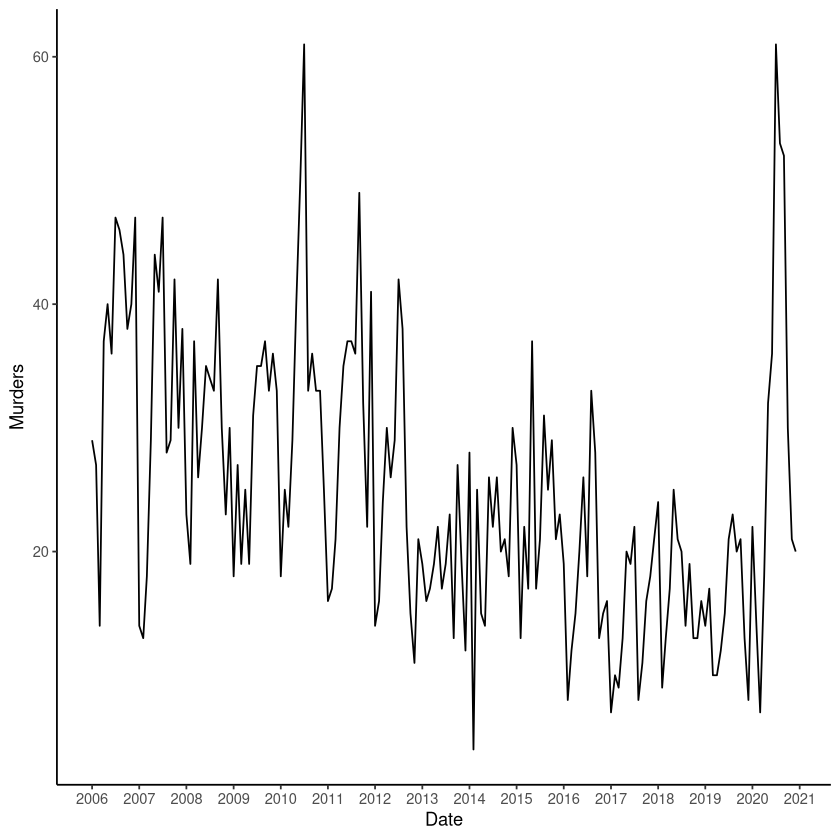

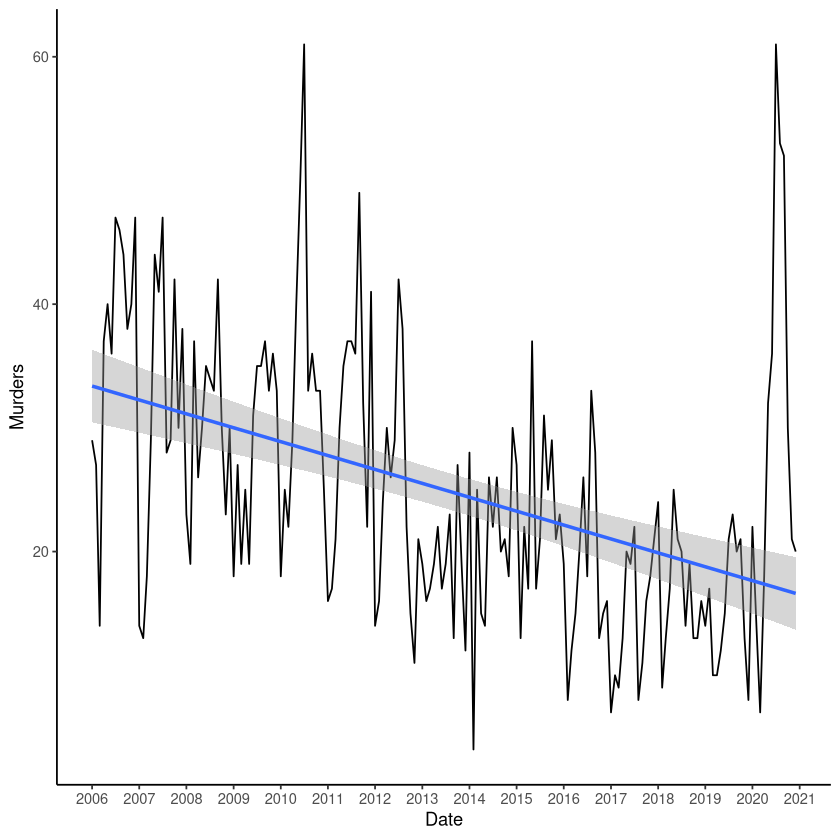

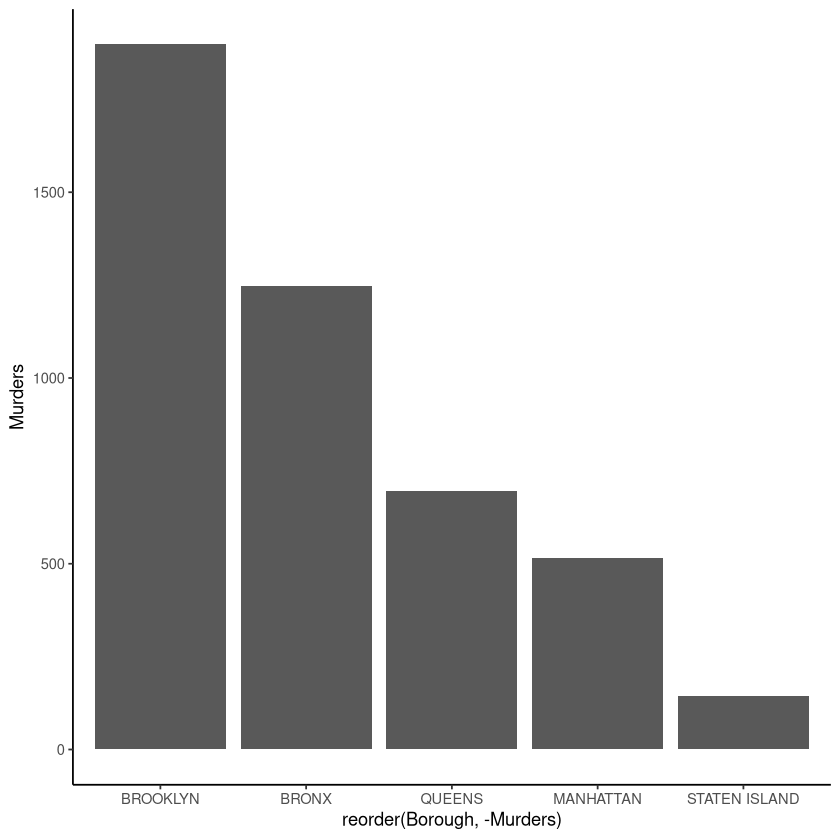

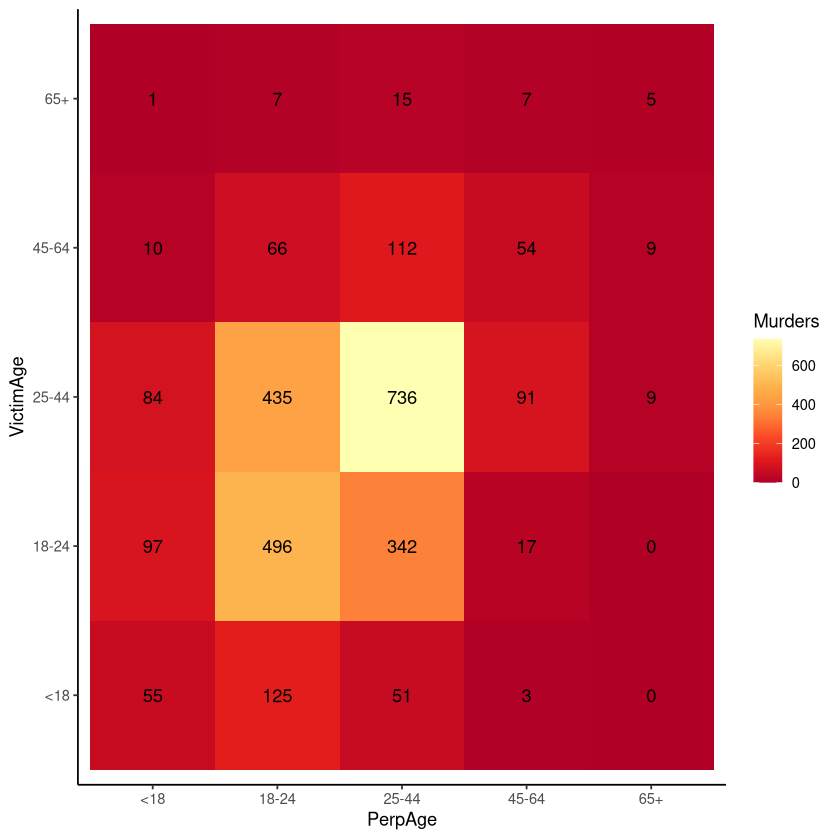

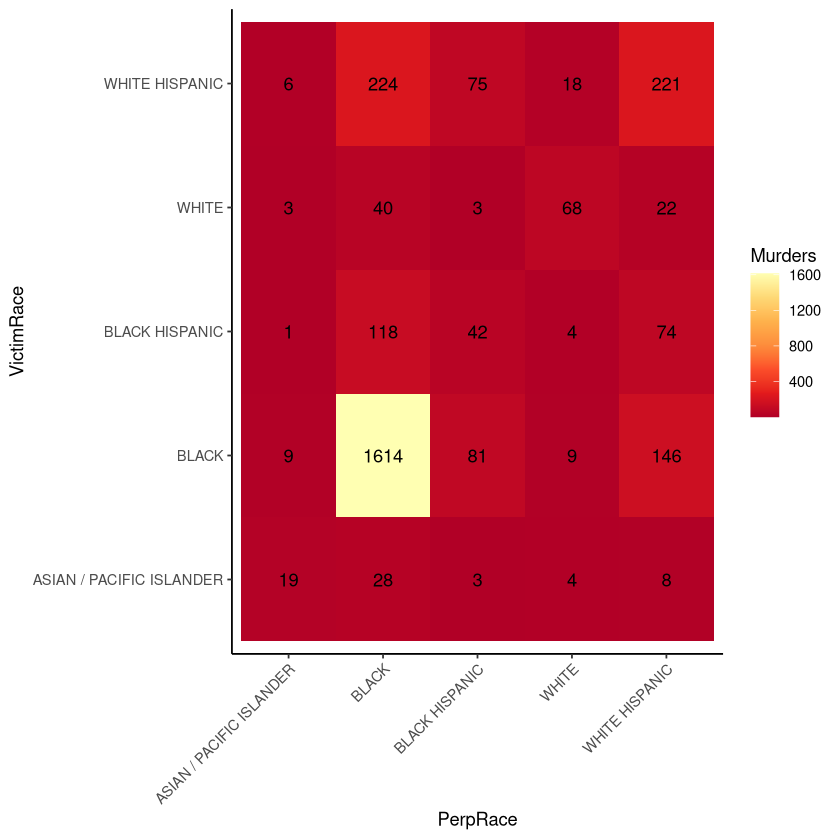

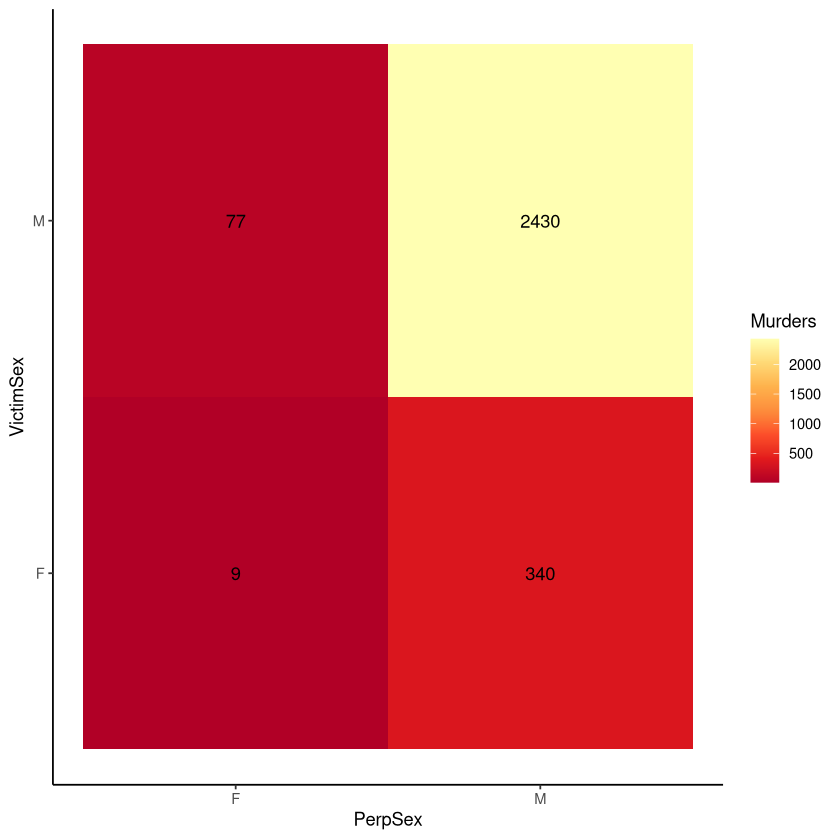

In [10]:
# [1] Create a line plot to show the number of murders each month
data.murders.by.month.plot <- ggplot(data=data.murders.by.month) +
    aes(x=Date, y=Murders) +
    scale_x_date(date_labels="%Y", date_breaks="1 year") +
    theme(axis.text.x=element_text(angle=45, hjust=1)) +
    geom_line() +
    theme_classic()

# It seems like we can fit a linear regression relatively well
data.murders.by.month.mod <- data.murders.by.month.plot +
        geom_smooth(method="lm")

data.murders.by.month.plot
data.murders.by.month.mod

# [2] Create a simple bar chart to visualize murders by borough
data.murders.by.borough.plot <- ggplot(data=data.murders.by.borough) +
    aes(x=reorder(Borough, -Murders), y=Murders) +
    geom_col() +
    theme_classic()

data.murders.by.borough.plot

# [3] Create a heatmap to visualize perpetrator Vs. victim age
data.murders.by.age.plot <- ggplot(data=data.murders.by.age) +
    aes(x=PerpAge, y=VictimAge, fill=Murders) +
    geom_tile() +
    scale_fill_distiller(palette="YlOrRd") +
    theme_classic() +
    geom_text(aes(label=Murders))

data.murders.by.age.plot

# [4] Create a heatmap to visualize perpetrator Vs. victim race
data.murders.by.race.plot <- ggplot(data=data.murders.by.race) +
    aes(x=PerpRace, y=VictimRace, fill=Murders) +
    geom_tile() +
    scale_fill_distiller(palette="YlOrRd") +
    theme_classic() +
    theme(axis.text.x=element_text(angle=45, hjust=1)) +
    geom_text(aes(label=Murders))

data.murders.by.race.plot

# [5] Create a heatmap to visualize perpetrator Vs. victim sex
data.murders.by.sex.plot <- ggplot(data=data.murders.by.sex) +
    aes(x=PerpSex, y=VictimSex, fill=Murders) +
    geom_tile() +
    scale_fill_distiller(palette="YlOrRd") +
    theme_classic() +
    geom_text(aes(label=Murders))

data.murders.by.sex.plot

In [17]:
# Save plots
ggsave("Figures/monthly_murders.svg", plot=data.murders.by.month.plot, height=8, width=13)
ggsave("Figures/monthly_murders_model.svg", plot=data.murders.by.month.mod, height=8, width=13)
ggsave("Figures/murders_by_burough.svg", plot=data.murders.by.borough.plot, height=8, width=13)
ggsave("Figures/murders_by_age.svg", plot=data.murders.by.age.plot)
ggsave("Figures/murders_by_race.svg", plot=data.murders.by.race.plot)
ggsave("Figures/murders_by_sex.svg", plot=data.murders.by.sex.plot)

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

